In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RsSj1Yzbw2RILvYwd7pm5YO7_uydIMqS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1RsSj1Yzbw2RILvYwd7pm5YO7_uydIMqS" -O Lena.bmp && rm -rf /tmp/cookies.txt

--2023-01-11 12:32:55--  https://docs.google.com/uc?export=download&confirm=&id=1RsSj1Yzbw2RILvYwd7pm5YO7_uydIMqS
Resolving docs.google.com (docs.google.com)... 108.177.98.100, 108.177.98.138, 108.177.98.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mmdjak9sp32g3m8mfvi2j3lj3j2a4nsm/1673440350000/01865608280713457520/*/1RsSj1Yzbw2RILvYwd7pm5YO7_uydIMqS?e=download&uuid=48797b4e-47df-4a4d-bfae-0024abf88713 [following]
--2023-01-11 12:32:55--  https://doc-0c-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mmdjak9sp32g3m8mfvi2j3lj3j2a4nsm/1673440350000/01865608280713457520/*/1RsSj1Yzbw2RILvYwd7pm5YO7_uydIMqS?e=download&uuid=48797b4e-47df-4a4d-bfae-0024abf88713
Resolving doc-0c-64-docs.googleusercontent.com (doc-0c-64-docs.googleusercontent.com)... 108.177.98.132, 2

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qCjwI6DRmF4UqR-7PTKy_0y-r4X9pSz4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qCjwI6DRmF4UqR-7PTKy_0y-r4X9pSz4" -O monalisa.bmp && rm -rf /tmp/cookies.txt

--2023-01-11 12:32:57--  https://docs.google.com/uc?export=download&confirm=&id=1qCjwI6DRmF4UqR-7PTKy_0y-r4X9pSz4
Resolving docs.google.com (docs.google.com)... 108.177.98.100, 108.177.98.138, 108.177.98.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnoddofnmchtvjam3l1cko0r0mg7c7js/1673440350000/01865608280713457520/*/1qCjwI6DRmF4UqR-7PTKy_0y-r4X9pSz4?e=download&uuid=9e9310f1-96a3-4afc-84ab-3b1c30414b63 [following]
--2023-01-11 12:32:58--  https://doc-0c-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnoddofnmchtvjam3l1cko0r0mg7c7js/1673440350000/01865608280713457520/*/1qCjwI6DRmF4UqR-7PTKy_0y-r4X9pSz4?e=download&uuid=9e9310f1-96a3-4afc-84ab-3b1c30414b63
Resolving doc-0c-64-docs.googleusercontent.com (doc-0c-64-docs.googleusercontent.com)... 108.177.98.132, 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
from math import *
from sklearn.metrics import mean_squared_error
import pywt
%matplotlib inline

In [4]:
def show_img(*args, figsize=10, is_gray=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    cmap=None
    if not is_gray:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    else:
        cmap = 'gray'
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        
        plt.imshow(images[i-1], cmap=cmap)
        plt.axis('off')

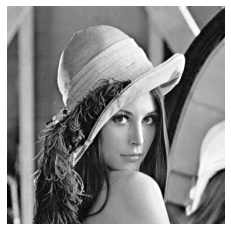

In [5]:
lena_img=cv2.imread('Lena.bmp')
lena_img = cv2.cvtColor(lena_img,cv2.COLOR_BGR2GRAY)
plt.imshow(lena_img,cmap='gray')
plt.axis('off')
plt.show()
#(512, 512) uint8

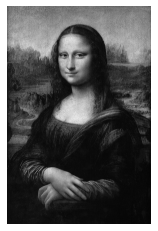

In [6]:
monalisa_img=cv2.imread('monalisa.bmp')
monalisa_img = cv2.cvtColor(monalisa_img,cv2.COLOR_BGR2GRAY)
plt.imshow(monalisa_img,cmap='gray')
plt.axis('off')
plt.show()

5

5.1. Pyramid

5.1.1. 

In [7]:
################ 5.1.1 ################

In [8]:
guassian_kernel = (1/16) * np.array([[1,2,1],[2,4,2],[1,2,1]])
guassian_kernel

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [9]:
def remove_row_col_downsampling(img,factor):
  return img[::factor,::factor]

In [23]:
def guassian_pyramid(img,kernel,level,q1=True):
  prev_level = img
  guass_array=[]
  guass_array.append(prev_level)
  out = np.zeros((img.shape[0],int(1.5*img.shape[1])))

  for i in range(0,level):
    filtered_img=cv2.filter2D(src=prev_level, ddepth=-1, kernel=kernel)
    next_level=remove_row_col_downsampling(filtered_img,2)
    guass_array.append(next_level)
    prev_level = next_level
  if q1==True:
    # put different levels of quassian pyramid in shape of pyramid
  
    #put level 0 
    out[0:guass_array[0].shape[0],0:guass_array[0].shape[1]]=guass_array[0]

    #put level 1
    out[0:guass_array[1].shape[0],guass_array[0].shape[1]-1:guass_array[0].shape[1]-1+guass_array[1].shape[1]]=guass_array[1]

    #put level 2
    out[guass_array[1].shape[0]-1:guass_array[1].shape[0]-1+guass_array[2].shape[0],guass_array[0].shape[1]-1:guass_array[0].shape[1]-1+guass_array[2].shape[1]]=guass_array[2]

    #put level 3
    row=guass_array[1].shape[0]+guass_array[2].shape[0]-1
    col=guass_array[0].shape[1]
    out[row-1:row-1+guass_array[3].shape[0],col-1:col-1+guass_array[3].shape[1]]=guass_array[3]
    
    #put level 4
    row=row-1+guass_array[3].shape[0]
    out[row-1:row-1+guass_array[4].shape[0],col-1:col-1+guass_array[4].shape[1]]=guass_array[4]

    #put level 5
    row=row-1+guass_array[4].shape[0]
    out[row-1:row-1+guass_array[5].shape[0],col-1:col-1+guass_array[5].shape[1]]=guass_array[5]

  # if q1== False:
  #   #put level 5
  #   for j in range(6,level+1):
  #     row=row-1+guass_array[j-1].shape[0]
  #     out[row-1:row-1+guass_array[j-1].shape[0],col-1:col-1+guass_array[j].shape[1]]=guass_array[j]

      
  return out,guass_array

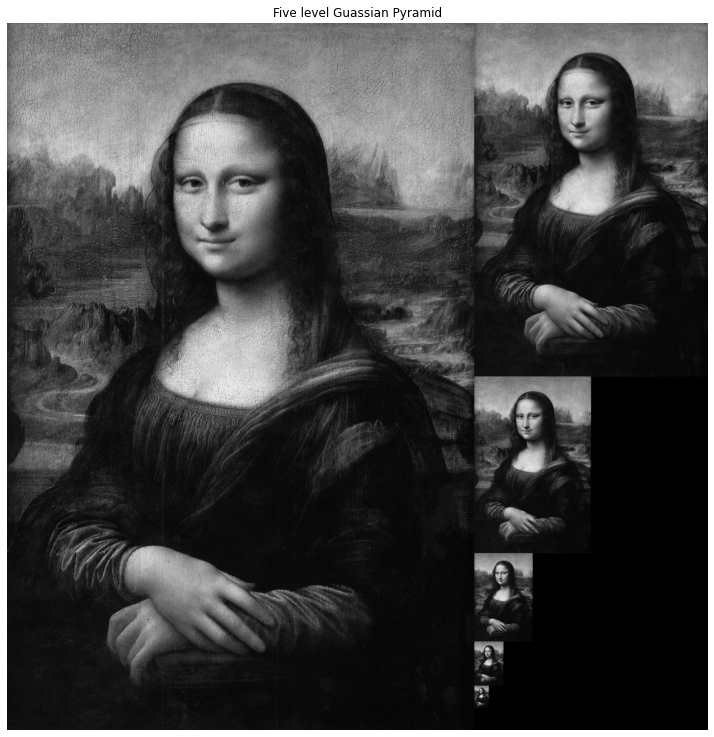

In [11]:
guassian_pyramid , guass_array=guassian_pyramid(monalisa_img,guassian_kernel,5)  
show_img(guassian_pyramid,title=['Five level Guassian Pyramid'],figsize=13)

In [12]:
type(guass_array)

list

In [13]:
def unsample_px_replication(img, factor):
    out = np.repeat(img, factor, axis=0)
    out = np.repeat(out, factor, axis=1)
    return out

In [14]:
def pad_even(img):
    shape_0 = img.shape[0]
    shape_1 = img.shape[1]

    if(img.shape[0]%2):
        shape_0 = img.shape[0]+1
    if(img.shape[1]%2):
        shape_1 = img.shape[1]+1

    out = np.zeros((shape_0, shape_1))
    out[0:img.shape[0], 0:img.shape[1]] = img
    return out

In [25]:
def laplacian_pyramid(guass_array,level,q1=True):
  img=guass_array[0]
  laplacian_array=[]
  out = pad_even(np.zeros((img.shape[0],int(1.5*img.shape[1]))))

  for i in range(0,level):
    upsample = (unsample_px_replication(guass_array[i+1],2))
    laplacian_array.append(pad_even(guass_array[i])-upsample)  
  laplacian_array.append((guass_array)[level])

  # put different levels of laplacian pyramid in shape of pyramid

  if q1==True:
    #put level 0 
    out[:,0:laplacian_array[0].shape[1]]=laplacian_array[0]

    #put level 1
    out[0:laplacian_array[1].shape[0],laplacian_array[0].shape[1]-2:laplacian_array[0].shape[1]-2+laplacian_array[1].shape[1]]=laplacian_array[1]
  
    #put level 2
    out[laplacian_array[1].shape[0]-1:laplacian_array[1].shape[0]-1+laplacian_array[2].shape[0],laplacian_array[0].shape[1]-1:laplacian_array[0].shape[1]-1+laplacian_array[2].shape[1]]=laplacian_array[2]
  
    #put level 3
    row=laplacian_array[1].shape[0]+laplacian_array[2].shape[0]-1
    col=laplacian_array[0].shape[1]
    out[row-1:row-1+laplacian_array[3].shape[0],col-1:col-1+laplacian_array[3].shape[1]]=laplacian_array[3]
    
    #put level 4
    row=row-1+laplacian_array[3].shape[0]
    out[row-1:row-1+laplacian_array[4].shape[0],col-1:col-1+laplacian_array[4].shape[1]]=laplacian_array[4]
  
    #put level 5
    row=row-1+laplacian_array[4].shape[0]
    out[row-1:row-1+laplacian_array[5].shape[0],col-1:col-1+laplacian_array[5].shape[1]]=laplacian_array[5]
  
  
  return out,laplacian_array

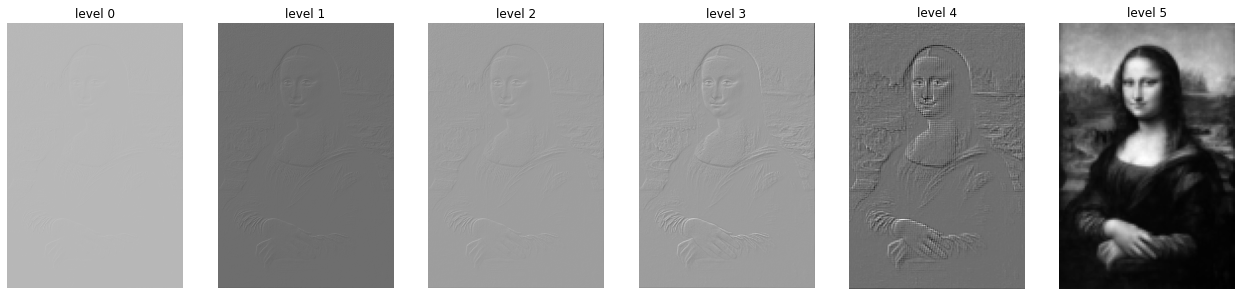

In [16]:
laplacian_pyramid,laplacian_array = laplacian_pyramid(guass_array,5)
show_img(laplacian_array,title=['level 0','level 1','level 2','level 3','level 4','level 5'],figsize=22)

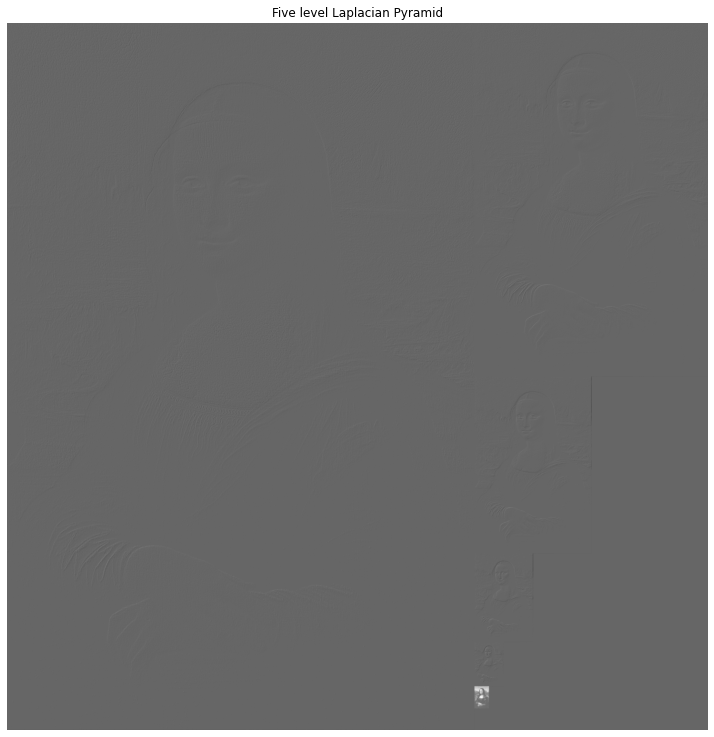

In [17]:
show_img(laplacian_pyramid,title=['Five level Laplacian Pyramid'],figsize=13)

In [18]:
for i,p in enumerate(laplacian_array):
  print(i,' ',p.shape)

0   (4290, 2836)
1   (2146, 1418)
2   (1074, 710)
3   (538, 356)
4   (270, 178)
5   (135, 89)


5.1.3.

In [19]:
################ 5.1.3 ################

In [26]:
lena_img.shape   #512 = 2^9 --> j=9 ---> j+1 level in pyramids
lena_j=9

In [21]:
################ biulding guassian_pyramid and residual pyramid ################

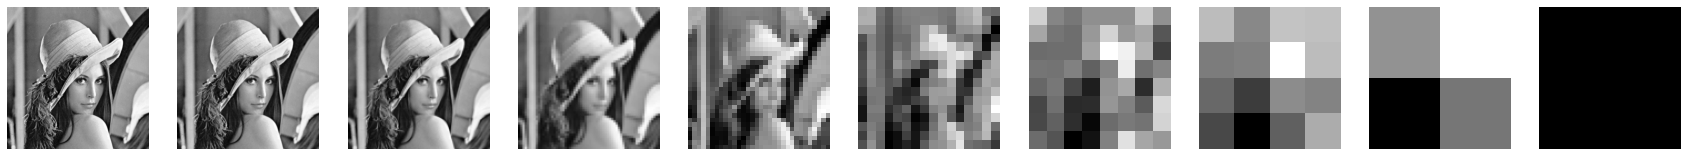

In [24]:
_ , lena_guass_array=guassian_pyramid(lena_img,guassian_kernel,9,q1=False)  
show_img(lena_guass_array,figsize=30)

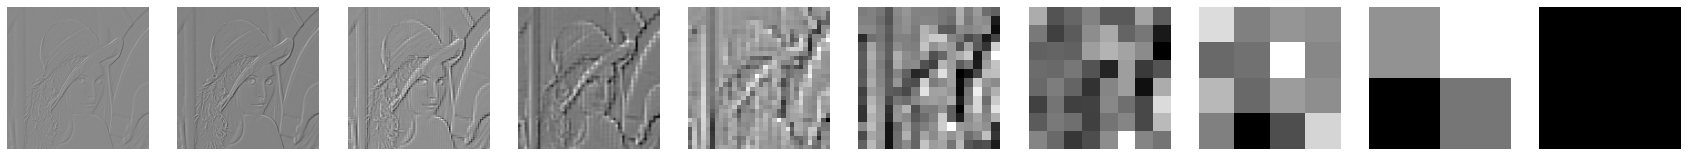

In [27]:
_,lena_laplacian_array = laplacian_pyramid(lena_guass_array,lena_j,q1=False)
show_img(lena_laplacian_array,figsize=30)

In [ ]:
################ reconstructing original lena image using guassian_pyramid and residual pyramid ################

In [28]:
def reconstruct_(guass_array,laplacin_array):
  levels= np.flip([i for i in range(0,len(guass_array))])
  constructed_array  = []
  out = (guass_array[-1])
  for i in levels:
    if i ==0 : continue
    upscale = unsample_px_replication((guass_array[i]),2)
    out = (upscale) + (laplacin_array[i-1])
    
  return out  

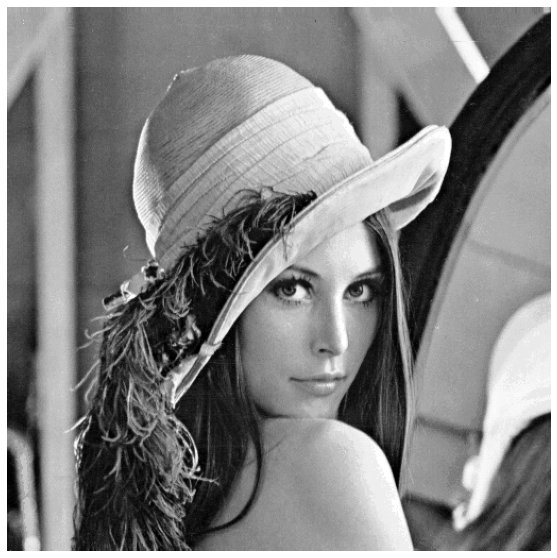

In [29]:
reconstructed_lena = reconstruct_(lena_guass_array,lena_laplacian_array)
show_img(reconstructed_lena)

5.1.4. 

In [ ]:
######## 5.1.4 ###############

In [30]:
box_filter_kernel = (1/9) * np.array([[1,1,1],[1,1,1],[1,1,1]])
box_filter_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [31]:
def boxfilter_pyramid(img,kernel,level,q1=True):
  prev_level = img
  boxfilter_array=[]
  boxfilter_array.append(prev_level)
  out = np.zeros((img.shape[0],int(1.5*img.shape[1])))

  for i in range(0,level):
    filtered_img=cv2.filter2D(src=prev_level, ddepth=-1, kernel=kernel)
    next_level=remove_row_col_downsampling(filtered_img,2)
    boxfilter_array.append(next_level)
    prev_level = next_level
  if q1==True:
    # put different levels of quassian pyramid in shape of pyramid
  
    #put level 0 
    out[0:boxfilter_array[0].shape[0],0:boxfilter_array[0].shape[1]]=boxfilter_array[0]

    #put level 1
    out[0:boxfilter_array[1].shape[0],boxfilter_array[0].shape[1]-1:boxfilter_array[0].shape[1]-1+boxfilter_array[1].shape[1]]=boxfilter_array[1]

    #put level 2
    out[boxfilter_array[1].shape[0]-1:boxfilter_array[1].shape[0]-1+boxfilter_array[2].shape[0],boxfilter_array[0].shape[1]-1:boxfilter_array[0].shape[1]-1+boxfilter_array[2].shape[1]]=boxfilter_array[2]

    #put level 3
    row=boxfilter_array[1].shape[0]+boxfilter_array[2].shape[0]-1
    col=boxfilter_array[0].shape[1]
    out[row-1:row-1+boxfilter_array[3].shape[0],col-1:col-1+boxfilter_array[3].shape[1]]=boxfilter_array[3]
  

      
  return out,boxfilter_array

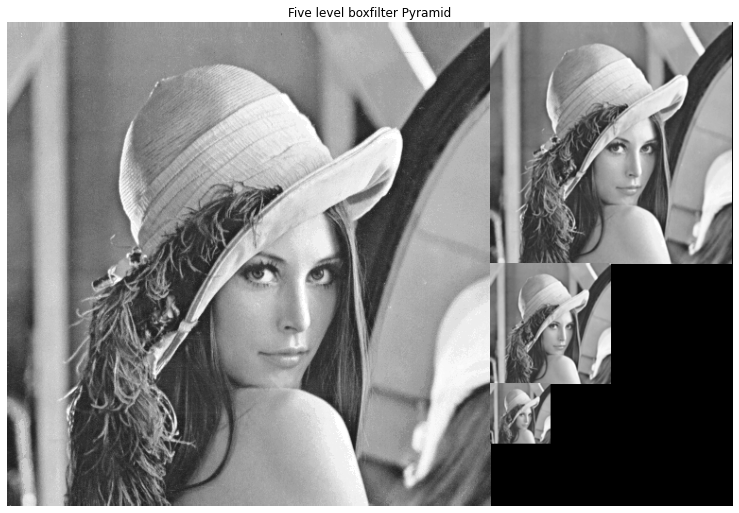

In [32]:
boxfilter_pyramid , boxfilter_array=boxfilter_pyramid(lena_img,box_filter_kernel,3)  
show_img(boxfilter_pyramid,title=['Five level boxfilter Pyramid'],figsize=13)

In [33]:
def boxfilter_laplacian_pyramid(boxfilter_array,level,q1=True):
  img=boxfilter_array[0]
  laplacian_array=[]
  out = pad_even(np.zeros((img.shape[0],int(1.5*img.shape[1]))))

  for i in range(0,level):
    upsample = (unsample_px_replication(boxfilter_array[i+1],2))
    laplacian_array.append(pad_even(boxfilter_array[i])-upsample)  
  laplacian_array.append((boxfilter_array)[level])

  # put different levels of laplacian pyramid in shape of pyramid

  if q1==True:
    #put level 0 
    out[:,0:laplacian_array[0].shape[1]]=laplacian_array[0]

    #put level 1
    out[0:laplacian_array[1].shape[0],laplacian_array[0].shape[1]-2:laplacian_array[0].shape[1]-2+laplacian_array[1].shape[1]]=laplacian_array[1]
  
    #put level 2
    out[laplacian_array[1].shape[0]-1:laplacian_array[1].shape[0]-1+laplacian_array[2].shape[0],laplacian_array[0].shape[1]-1:laplacian_array[0].shape[1]-1+laplacian_array[2].shape[1]]=laplacian_array[2]
  
    #put level 3
    row=laplacian_array[1].shape[0]+laplacian_array[2].shape[0]-1
    col=laplacian_array[0].shape[1]
    out[row-1:row-1+laplacian_array[3].shape[0],col-1:col-1+laplacian_array[3].shape[1]]=laplacian_array[3]
    
    # #put level 4
    # row=row-1+laplacian_array[3].shape[0]
    # out[row-1:row-1+laplacian_array[4].shape[0],col-1:col-1+laplacian_array[4].shape[1]]=laplacian_array[4]
  
    # #put level 5
    # row=row-1+laplacian_array[4].shape[0]
    # out[row-1:row-1+laplacian_array[5].shape[0],col-1:col-1+laplacian_array[5].shape[1]]=laplacian_array[5]
  
  
  return out,laplacian_array

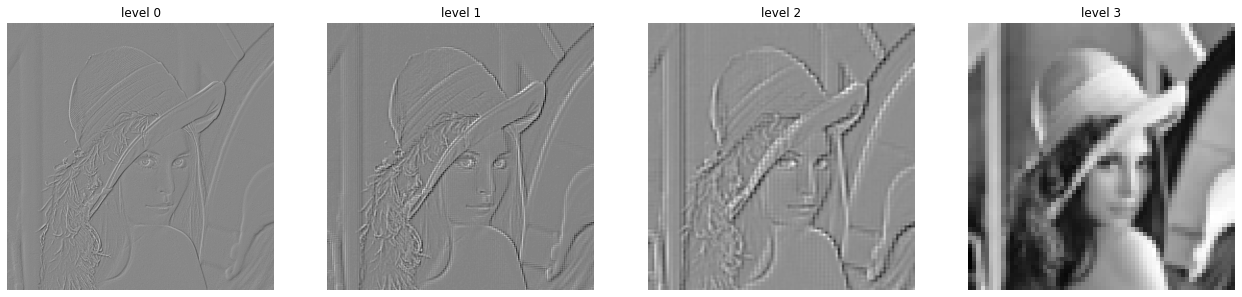

In [34]:
laplacian_pyramid,laplacian_boxfilter_array = boxfilter_laplacian_pyramid(boxfilter_array,3)
show_img(laplacian_boxfilter_array,title=['level 0','level 1','level 2','level 3'],figsize=22)

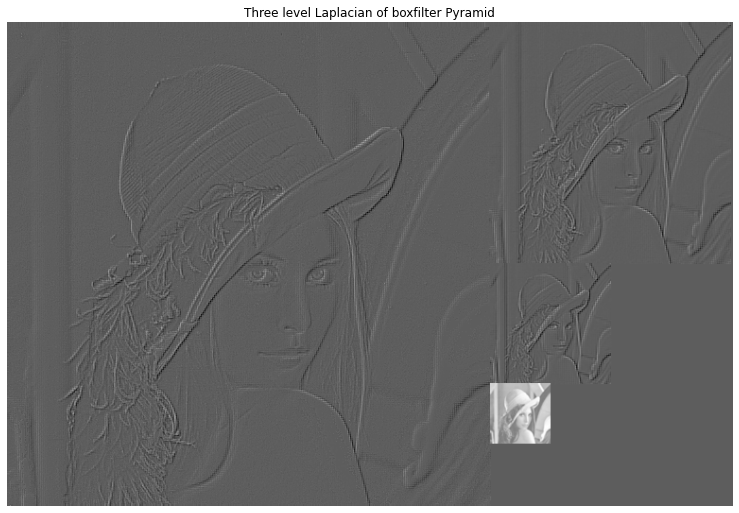

In [35]:
show_img(laplacian_pyramid,title=['Three level Laplacian of boxfilter Pyramid'],figsize=13)

In [36]:
def normalize(img):
  min = np.min(img)
  max = np.max(img)
  return ((img-min)/(max-min)*255).astype('uint8')

In [37]:
def wawelet_transform(img,levels):
  wt_out  = np.zeros((img.shape[0],img.shape[1]))
  appriximations= np.zeros((img.shape[0],int(1.5*img.shape[1])))
  
  appriximations[:,0:img.shape[1]]=img
  img_col = img.shape[1]
  # wavelet transform
  coeffs = pywt.wavedec2(img, 'haar', mode='periodization', level=levels)

  # Put coefficients in a matrix
  c_matrix, c_slices = pywt.coeffs_to_array(coeffs)

  ##  get approximations 
  row_pointer = 0 
  for i in range(0, levels):
    cA, _ = pywt.dwt2(img, 'haar', mode='periodization')
    print(cA.shape)
    appriximations[row_pointer:row_pointer+cA.shape[0],img_col:img_col+cA.shape[1]] = normalize(cA)
    row_pointer+=cA.shape[0]
    img=cA


  # return wt_out,appriximations_wrap
  return c_matrix,coeffs,appriximations

(256, 256)
(128, 128)
(64, 64)


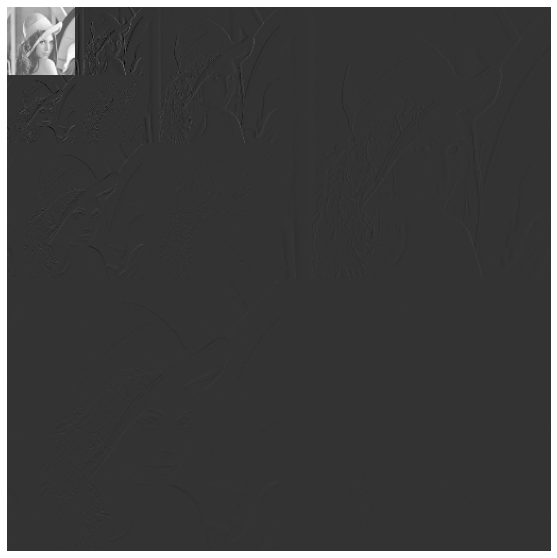

In [38]:
wt_out,coeffs,appriximations_wrap = wawelet_transform(lena_img,3)
show_img(wt_out)

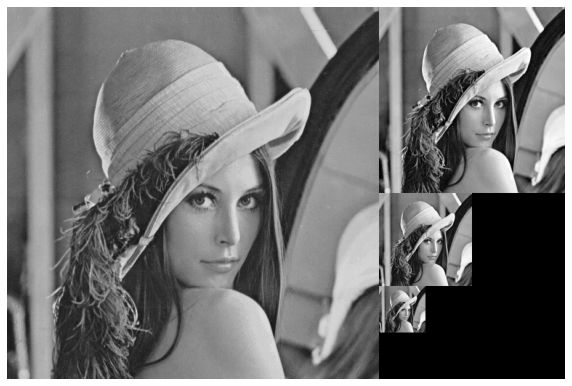

In [39]:
show_img(appriximations_wrap)

5.1.6.

In [40]:
(coeffs[1])

(array([[  7.5  ,   9.5  ,   8.   , ...,  -5.125, -11.5  , 177.75 ],
        [ -2.   ,  -5.25 ,  -4.25 , ...,  -7.125, 145.25 ,  19.75 ],
        [ -0.875,  -5.625,  -3.875, ..., 162.625,  -6.   ,  -5.125],
        ...,
        [ 60.125,  46.125,  13.   , ...,  12.875,  14.625,  29.125],
        [ 20.25 ,  40.875, -70.75 , ...,  62.375,  13.25 , -26.25 ],
        [  1.875,  30.75 ,  13.875, ...,  39.875, -15.375, -73.75 ]]),
 array([[   7.25 ,   23.5  ,   14.75 , ...,   14.625,  -13.5  ,   73.25 ],
        [   3.75 ,   -0.25 ,    4.   , ...,   -9.875,  139.5  ,   12.25 ],
        [   3.375,   -0.875,    6.375, ...,  157.875,    7.5  ,   -2.625],
        ...,
        [-101.625,  -93.375,  -63.25 , ...,   59.625,   36.125,   31.875],
        [ -13.25 , -103.375, -106.25 , ...,   90.375,    8.25 ,  -13.75 ],
        [  -1.375, -118.25 ,  -64.625, ...,   44.375,  -44.625,  -62.   ]]),
 array([[  2.75 ,  -2.5  ,   2.25 , ...,   4.375,   4.5  , -49.25 ],
        [ -1.   ,  11.75 ,   3.75 , .

In [ ]:
######## 5.1.6 ###########

In [47]:
def coefficiant_quantize(coeffs,step_size):
  length = len(coeffs)
  new_coeff = []
  new_coeff.append(step_size * np.sign(coeffs[0]) * np.floor(np.abs(coeffs[0])/step_size))
  for i in range(1,length):
    h,v,d = coeffs[i]
    new_h = step_size * np.sign(h) * np.floor(np.abs(h)/step_size) 
    new_v = step_size * np.sign(v) * np.floor(np.abs(v)/step_size) 
    new_d = step_size * np.sign(d) * np.floor(np.abs(d)/step_size) 
    new_coeff.append((new_h,new_v,new_d))
   
  return new_coeff

In [48]:
new_coeffs = coefficiant_quantize(coeffs,2)
len(new_coeffs[0:2])

2

In [49]:
def reconstruct_wawelet_coeff(new_coeffs):
  length = len(new_coeffs)
  reconstructed_img = pywt.idwt2(new_coeffs[0:2], 'haar', mode='periodization')
  for i in range(2,length):
    reconstructed_img = pywt.idwt2([reconstructed_img,new_coeffs[i]], 'haar', mode='periodization')
  return reconstructed_img

In [50]:
reconstructed_img = reconstruct_wawelet_coeff(new_coeffs)
reconstructed_img

array([[157.75, 157.75, 161.75, ..., 165.75, 147.75, 123.75],
       [157.75, 157.75, 161.75, ..., 165.75, 147.75, 123.75],
       [157.75, 157.75, 161.75, ..., 165.75, 147.75, 123.75],
       ...,
       [ 40.75,  40.75,  43.75, ...,  98.5 ,  96.5 ,  92.5 ],
       [ 40.75,  40.75,  48.75, ..., 100.5 , 101.5 , 101.5 ],
       [ 40.75,  40.75,  48.75, ..., 100.5 , 101.5 , 101.5 ]])

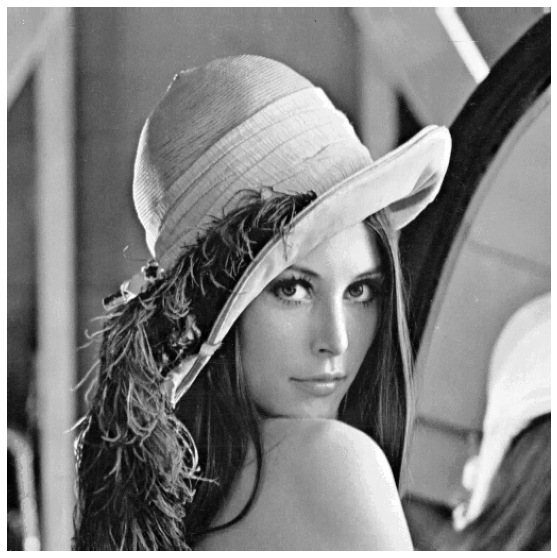

In [51]:
show_img(reconstructed_img)

In [46]:
psnr = cv2.PSNR(lena_img,reconstructed_img.astype('uint8'))
psnr

20.79841487280654